In [ ]:
import numpy as np
def data_matrix(N,M,D):
  # np.random.seed(1) #to get same result
  # 1) Input: Sample size N and a generator matrix S of size MxD

  #First generate a random 2-D array of size NxM
  A=np.random.rand(N,M)
  #print(A)

  #Generator matrix taken as random no. matrix
  S=np.random.normal(size = [M,D])
  #print(S)

  #output matrix X = A * S
  X= np.dot(A,S)
  #print(f"Data matrix of size {N} x {D} is: {X}")
  return X

D=5
M=4
N=3
X= data_matrix(N,M,D)
print(X)

[[ 1.02832984  0.11225452  2.00663865  0.05998885 -0.17681086]
 [ 0.16858948  0.12158308  1.64403337  0.39273181 -0.18016995]
 [ 0.72217535 -0.78527737  3.25618865 -0.58041193 -0.45921028]]


In [ ]:
# 2) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ
def target_vector(variance):
  #Weight vector of size (D+1)*1
  W=np.random.normal(size = [D+1,1])
  #print(W)

  #checking size mismatch of X & W
  # if np.size(X,1) != np.size(W,0):
  #     #print("Size of X-column and W-rows are not equal")

  # else:
  #     #print("Size of X-column and W-rows are equal")

  #converting D+1 matrix to D size matrix
  Wdash= [[0]*1]*D
  for index in range(D):
      Wdash[index]=W[index]

  #print(Wdash)

  #multiply matrix X and Wdash
  tdash=np.dot(X,Wdash)
  #print(f"tdash : {tdash}")
  td=tdash+W[D]
  #td=[x+W[D] for x in tdash]

  #print(f"td:{td}")

  #add zero mean gaussian noise
  mu=0
  sigma=np.sqrt(variance)
  #noise=np.random.normal(mu,sigma,[1,N])
  noise=np.random.normal(mu,sigma,N)
  #print(f"noise:{noise}")
  tdflat=td.flatten()
  #print(tdflat)
  t=tdflat + noise
  t=t.flatten()
  #print(f"target vector t of size 1x{N} : {t}")
  return t

target_vector(2)

array([ 0.78078016, -0.09152114,  2.29028636])

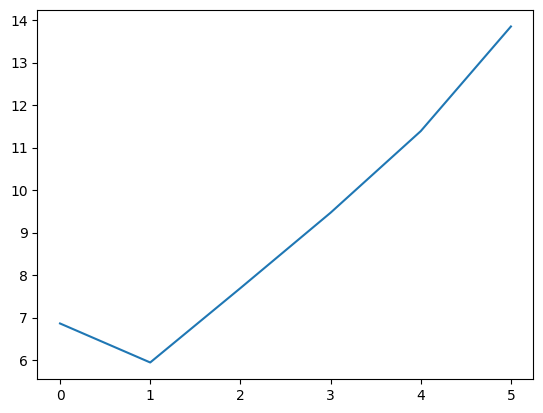

In [ ]:
# 3) pseudo-inverse (pinv) of data matrix (X)
# ref: geeksforgeeks
import matplotlib.pyplot as plt

import time
D=10
M=10
ms=[]
for N_power in range(1,7):
  start = time.perf_counter()
  N=np.power(10,N_power)
  X=data_matrix(N,M,D)
  Xinv = np.linalg.pinv(X)
  end = time.perf_counter()
  a=(end-start) * 10**6
  ms.append(a)

ms= np.log(ms)
plt.plot(ms)


In [ ]:
def weightinitialization(D):
  np.random.seed(1)
  weight_vector=np.random.normal(size = [D,1])
  return weight_vector

def initial_predicted_vector(weight_vector,X):
  weight_vector=weightinitialization(D)
  weight_vector=weight_vector.flatten()
  predicted_vector=np.dot(X,weight_vector)
  predicted_vector=predicted_vector.flatten()
  #print(predicted_vector)
  return predicted_vector

weight_vector=weightinitialization(D)
predicted_vector=initial_predicted_vector(weight_vector,X)

In [ ]:
# 4) Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y
# ref : stackoverflow
def nrmse_fun(t, predicted_vector):
  nrmse = (np.sqrt(np.mean((t-predicted_vector)**2)))/np.std(t)
  return nrmse

In [ ]:
# 5) Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression.
# ref: skill-lync
#inputs : Data matrix X (N*D), Weight vector W ((D+1)*1) and target vector t (N*1)
#output : gradient of mean squared error/ loss function
def grad_mse_L1(D,t,predicted_vector,X,lamda1):
  grad=[]
  for i in range(D):
    a= np.dot((t-predicted_vector),X[:,i])
    grad.append(a+lamda1)
  return grad

def grad_mse_L2(D,t,predicted_vector,X,lamda2,weight_vector):
  grad=[]
  for i in range(D):
    a= np.dot((t-predicted_vector),X[:,i])
    grad.append(a+lamda2)
  return grad

# variance=2
# t=target_vector(variance)
# lamda2=0
# D=5
# M=4
# N=3
# X= data_matrix(N,M,D)
# g=grad_mse_L2(D,t,predicted_vector,X,lamda2,weight_vector)
# print(g)

In [ ]:
# 6) Write a function to calculate gradient of L2 norm of weights with respect to weights.
# ref: neuraspike
# ref : towardsdatascience

def Ltwo_model(D,t,predicted_vector,X,lamda2,weight_vector):

    # Calculate the cost
    C = sum((t-predicted_vector)**2) / len(t)
    C1=C
    # For Ridge Regression (L2), add the squared magnitude
    C += lamda2/len(t) * sum(weight_vector**2)
    return C

# Loss= Ltwo_model(D,t,predicted_vector,X,1,weight_vector)
# print(Loss)


In [ ]:
# 7) Write a function to calculate gradient of L1 norm of weights with respect to weights.
# ref : towardsdatascience

def Lone_model(D,t,predicted_vector,X,lamda1,weight_vector):

    # Calculate the cost
    C = sum((t-predicted_vector)**2) / len(t)
    C1=C
    # For Ridge Regression (L1), add the w magnitude
    C += lamda1/len(t) * sum(abs(weight_vector))
    return C

# Loss= Lone_model(D,t,predicted_vector,X,1,weight_vector)
# print(Loss)

In [ ]:
# 8) Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for
#    linear regression. Use an appropriate stopping criterion.

def Lonetwo_model(D,t,predicted_vector,X,lamda1,lamda2,weight_vector):

    # Calculate the cost
    C = sum((t-predicted_vector)**2) / len(t)
    C1=C
    # For Ridge Regression (L2), add the squared magnitude
    C += lamda1/len(t) * sum(weight_vector) + lamda2/len(t) * sum(weight_vector**2)
    return C

# Loss= Lonetwo_model(D,t,predicted_vector,X,1,1,weight_vector)
# print(Loss)


[-11.36830518 240.72801276 195.01024473  55.74355857  29.4242871 ]
7.8839425008715525
999
[-12.73309662 242.02869089 193.1943265   56.25745138  29.27400893]
1.5549986654546197
999
[-12.73309662 242.02869089 193.1943265   56.25745138  29.27400893]
1.5549986654546197
999
[-12.73309662 242.02869089 193.1943265   56.25745138  29.27400893]
1.5549986654546197
999
[-12.73309662 242.02869089 193.1943265   56.25745138  29.27400893]
1.5549986654546197
999
[-11.19293092 241.98299021 193.41934537  56.19850362  29.06017699]
2.9232257699291204
999
[-11.19293092 241.98299021 193.41934537  56.19850362  29.06017699]
2.9232257699291204
999
[-11.19293092 241.98299021 193.41934537  56.19850362  29.06017699]
2.9232257699291204
999
[-11.19293092 241.98299021 193.41934537  56.19850362  29.06017699]
2.9232257699291204
999
[-11.19293092 241.98299021 193.41934537  56.19850362  29.06017699]
2.9232257699291204
999
[-10.5549734  241.96406037 193.51255123  56.17408666  28.9716049 ]
4.046045988882385
999
[-10.554973

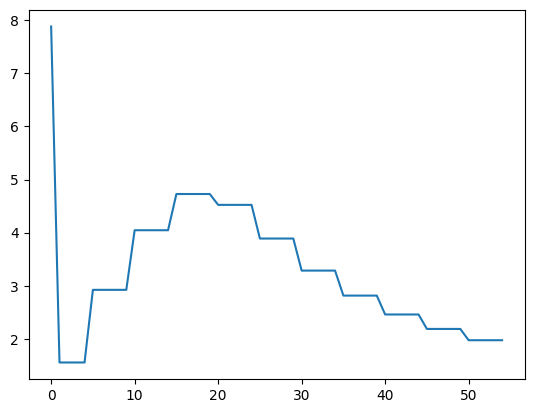

In [ ]:
# 9) Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
# results of the following experiment run five times for each value of σ where G is an identity matrix.
import matplotlib.pyplot as plt
nrmse_range=[]

# N=int(input("Enter sample size (N):"))
# M=int(input("Enter generator matrix S row size (M):"))
# D=int(input("Enter generator matrix S column size (D):"))
N=3
M=4
D=5

X= data_matrix(N,M,D)


for variance in range(11):

  sigma=np.sqrt(variance)

#run five times for each value of σ
  for value_of_sigma in range(1,6):
    t= target_vector(variance)

    weight_vector=weightinitialization(D)
    weight_vector=weight_vector.flatten()
    predicted_vector=np.dot(X,weight_vector)
    Loss=[]
    lamda1=2
    for i in range(1000):
      alpha=0.1

      grad= grad_mse_L1(D,t,predicted_vector,X,lamda1)
      weight_vector = weight_vector + (np.dot(alpha,grad))
      predicted_vector=np.dot(X,weight_vector)
      predicted_vector=predicted_vector.flatten()
      L=Lone_model(D,t,predicted_vector,X,lamda1,weight_vector)
      Loss.append(L)
      if L < 3 :
        break
    print(weight_vector)
    print(nrmse_fun(t, predicted_vector))
    nrmse_range.append(nrmse_fun(t, predicted_vector))
    print(i)

plt.plot(nrmse_range)

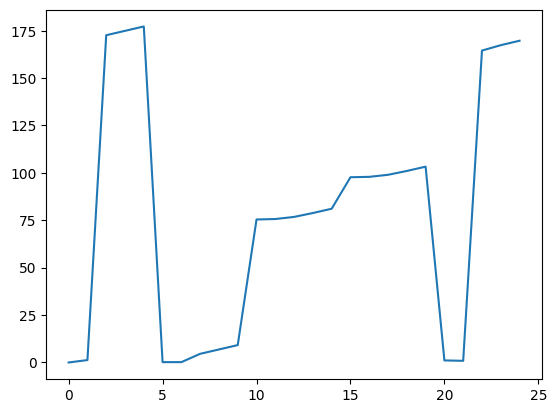

In [ ]:
# 10) Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
# results of the following experiment run five times for each value of σ where G is an identity matrix.
import matplotlib.pyplot as plt
nrmse_range=[]

# N=int(input("Enter sample size (N):"))
# M=int(input("Enter generator matrix S row size (M):"))
# D=int(input("Enter generator matrix S column size (D):"))
for N in range(5,10):
  M=4
  D=5
  variance=2
  X= data_matrix(N,M,D)
  t= target_vector(variance)


  for lamda_pow in range(5):
    weight_vector=weightinitialization(D)
    weight_vector=weight_vector.flatten()
    predicted_vector=np.dot(X,weight_vector)
    Loss=[]
    lamda2=np.power(10,lamda_pow)
    for i in range(100):
      alpha=0.1
      grad= grad_mse_L2(D,t,predicted_vector,X,lamda2,weight_vector)
      weight_vector = weight_vector + (np.dot(alpha,grad))
      predicted_vector=np.dot(X,weight_vector)
      predicted_vector=predicted_vector.flatten()
      L=Lone_model(D,t,predicted_vector,X,lamda2,weight_vector)
      Loss.append(L)
      if L < 30 :
        break
    nrmse=nrmse_fun(t,predicted_vector)
    nrmse_range.append(nrmse)
nrmse_range= np.log(nrmse_range)
plt.plot(nrmse_range)

X : [[-1.09806608]
 [-1.30018643]
 [-0.44630099]
 [-2.18443896]
 [ 0.30137434]
 [-0.10118767]
 [-1.54218449]
 [-2.2388595 ]
 [-0.44421936]
 [-0.72311738]]
t : [ 0.22052063 -0.80035483 -0.20847312 -0.66945931  1.64869072  0.5983455
 -0.48129941 -2.20665149  1.68434563 -0.25016685]
weight_vector : [1.62434536]
predicted_vector : [-1.78363854 -2.11195179 -0.72494695 -3.54828329  0.48953601 -0.16436372
 -2.50504022 -3.63668104 -0.72156566 -1.17459237]
[-17.212812532641163]
[-0.09693588960087474, 0.9494846600822959, 0.3133329767227311, 0.7000694225654063, 0.4649602772855259, 0.6078904582613379, 0.520998744162088, 0.5738229267634064, 0.5417094589094961, 0.5612322374328763, 0.5493637315771145, 0.5565789663901078, 0.5521926001499666, 0.554859208970237, 0.5532380943138114, 0.5542236204657168, 0.5536244883856756, 0.553988719460255, 0.5537672920319655]


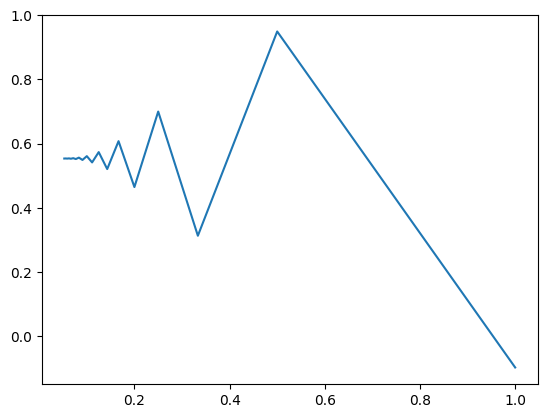

In [ ]:
# 11) Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot
# weights versus 1/λ1.

import matplotlib.pyplot as plt
nrmse_range=[]

# N=int(input("Enter sample size (N):"))
# M=int(input("Enter generator matrix S row size (M):"))
# D=int(input("Enter generator matrix S column size (D):"))
N=10
M=10
D=1

X= data_matrix(N,M,D)
t= target_vector(variance)
print(f"X : {X}")
print(f"t : {t}")

weight_vector=weightinitialization(D)
weight_vector=weight_vector.flatten()
print(f"weight_vector : {weight_vector}")
predicted_vector=np.dot(X,weight_vector)
print(f"predicted_vector : {predicted_vector}")
lamda2=1
g=grad_mse_L2(D,t,predicted_vector,X,lamda2,weight_vector)
print(g)
Loss=[]
w1=[]
inv_Lamda1=[]
for lamda1 in range(1,20):

  for i in range(100):
    alpha=0.1
    grad= grad_mse_L2(D,t,predicted_vector,X,lamda2,weight_vector)
    weight_vector = weight_vector + (np.dot(alpha,grad))
    predicted_vector=np.dot(X,weight_vector)
    predicted_vector=predicted_vector.flatten()
    L=Lone_model(D,t,predicted_vector,X,lamda1,weight_vector)
    Loss.append(L)
    if L < 2 :
      break
    print(weight_vector)
  inv_Lamda1.append(1/lamda1)
  w1.append(weight_vector[0])
print(w1)
plt.plot(inv_Lamda1,w1)

In [ ]:
# 12) Show the grouping effect of elastic net on correlated columns of X.
# by using both L1 and L2 norm, we will get benefit of both regularization

N=3
M=4
D=5
variance=3
X= data_matrix(N,M,D)

t= target_vector(variance)

weight_vector=weightinitialization(D)
weight_vector=weight_vector.flatten()
predicted_vector=np.dot(X,weight_vector)
print(predicted_vector)
print(weight_vector)
Loss=[]
lamda1=2
lamda2=1
for i in range(100):
  alpha=0.1
  grad1= grad_mse_L1(D,t,predicted_vector,X,lamda1)
  #print(f"grad1 at {i}th iteration: {grad1}")
  grad2= grad_mse_L2(D,t,predicted_vector,X,lamda2,weight_vector)
  #print(f"grad2 at {i}th iteration: {grad2}")
  weight_vector = (weight_vector - np.dot(alpha,grad1)+ np.dot(alpha,grad2))
  #print(f"w at {i}th iteration: {weight_vector}")
  predicted_vector=np.dot(X,weight_vector)
  predicted_vector=predicted_vector.flatten()
  L=Lonetwo_model(D,t,predicted_vector,X,lamda1,lamda2,weight_vector)
  Loss.append(L)
  if L < 5 :
    break

print(L)

[1.40538133 2.74847969 4.61221968]
[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
grad1 at 0th iteration: [-5.289213872174228, 8.137793518361887, 3.7296661701916056, 6.922889073803818, 2.4359366667512834]
grad2 at 0th iteration: [-6.289213872174228, 7.137793518361887, 2.7296661701916056, 5.922889073803818, 1.4359366667512832]
w at 0th iteration: [ 1.52434536 -0.71175641 -0.62817175 -1.17296862  0.76540763]
grad1 at 1th iteration: [-5.632956699934951, 8.383746720378008, 3.9049912499848216, 7.228725761443075, 2.4891194615762084]
grad2 at 1th iteration: [-6.632956699934951, 7.383746720378008, 2.9049912499848216, 6.228725761443075, 1.4891194615762087]
w at 1th iteration: [ 1.42434536 -0.81175641 -0.72817175 -1.27296862  0.66540763]
grad1 at 2th iteration: [-5.976699527695674, 8.629699922394131, 4.080316329778038, 7.53456244908233, 2.542302256401134]
grad2 at 2th iteration: [-6.976699527695674, 7.62969992239413, 3.0803163297780376, 6.53456244908233, 1.542302256401134]
w at 2t

In [ ]:
# 13) Write a function for generating linear binary classification vector t with noise variance σ.

def binary_classification(N,M,D,sigma):

  noise = np.random.normal(0, sigma, N)
  t_b = np.sign(noise)
  t_b=t_b.flatten()
  return t_b


In [ ]:
# 14) Write a function for computing gradient of binary cross-entropy for logistic regression.

def ce_gradient(X, t_b, w):
    m = len(t_b)
    z = np.dot(X, w)
    h = 1 / (1 + np.exp(-z))
    h=h.flatten()
    XT=X.T
    gradient = np.dot(XT,(h - t_b))/m
    return gradient
# N=10
# M=5
# D=5
# X=data_matrix(N,M,D)

# sigma=2
# t_b=binary_classification(N,M,D,sigma)
# w=weightinitialization(D)

# ce_grad=ce_gradient(X,t_b, w)

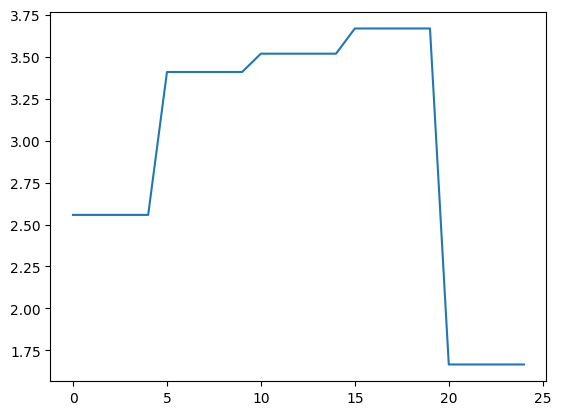

In [ ]:
# 15) Repeat experiment 10 for binary classification.

nrmse_range=[]

# N=int(input("Enter sample size (N):"))
# M=int(input("Enter generator matrix S row size (M):"))
# D=int(input("Enter generator matrix S column size (D):"))
for N in range(5,10):
  M=4
  D=5
  sigma=2
  X= data_matrix(N,M,D)
  t_b= binary_classification(N,M,D,sigma)


  for lamda_pow in range(5):
    w=weightinitialization(D)
    w=w.flatten()
    predicted_vector=np.dot(X,w)
    Loss=[]
    lamda2=np.power(10,lamda_pow)
    for i in range(100):
      alpha=0.1
      grad= ce_gradient(X, t_b, w)
      w = w + (np.dot(alpha,grad))
      predicted_vector=np.dot(X,w)
      predicted_vector=predicted_vector.flatten()
      L=Ltwo_model(D,t_b,predicted_vector,X,lamda2,weight_vector)
      Loss.append(L)
      if L < 3 :
        break
    nrmse=nrmse_fun(t_b,predicted_vector)
    nrmse_range.append(nrmse)
nrmse_range= np.log(nrmse_range)
plt.plot(nrmse_range)